***Assignment 1 - Dog Breed Dataset***

Amit Wolf - 307854364, Idan Albilia - 311375612


# **RELOAD**

done
(10222, 220, 220, 3)
[19 37 85 ...  3 75 28]
['bedlington_terrier']


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


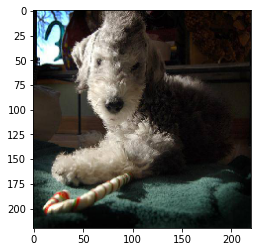

In [1]:
# //this segment was written to easily reload the data for when the ram causes a crash.

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image as IMGPP
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, AvgPool2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from keras.applications import inception_v3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import zeros, array, uint8
from scipy.stats import itemfreq
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
import pickle
import numpy as np

Labels = pd.read_csv('/content/drive/MyDrive/Assigment1/labels.csv',delimiter = ",")
Submission = pd.read_csv('/content/drive/MyDrive/Assigment1/sample_submission.csv',delimiter = ",")
# Labels['id'] = Labels['id'].apply(lambda x: x+".jpg")
print("done")

newTrain = pickle.load( open( "/content/drive/MyDrive/Assigment1/"+"sorted.p", "rb" ) )
print(newTrain.shape)

labels = Labels["breed"].values
labelIDs = Labels["id"].values
NewLabels = Labels[:]
NewLabels.drop('id', axis='columns', inplace=True)

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(NewLabels)


newTest = newTrain[-3000:]
newTrain = newTrain[:-3000]

onehot_Test = onehot_encoded[-3000:]
onehot_encoded = onehot_encoded[:-3000]
TestLabels = integer_encoded[-3000:]

inverted = label_encoder.inverse_transform([argmax(onehot_encoded[6, :])])
print(inverted)
plt.imshow(newTrain[6])

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image as IMGPP
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, AvgPool2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from keras.applications import inception_v3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import zeros, array, uint8
from scipy.stats import itemfreq
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
import pickle
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
Labels = pd.read_csv('/content/drive/MyDrive/Assigment1/labels.csv',delimiter = ",")
Submission = pd.read_csv('/content/drive/MyDrive/Assigment1/sample_submission.csv',delimiter = ",")
# Labels['id'] = Labels['id'].apply(lambda x: x+".jpg")
print("done")

done


## 1.a - 
  the Train size is 10222 Images.
  
  the Test size is 10357 Images.

In [5]:
# 1.a
print("train set size - "+str(Labels.shape))
print("test set size - "+str(Submission.shape))

train set size - (10222, 2)
test set size - (10357, 121)


## 1.b - 
  The images vary in size ,the vast majority of them are in RGB format meaning  they have 3 channels.
  there are 120 possible dog breeds in the dataset  - meaning 120 classes.
  because of the varying image size Preprocessing is required in order to resize the images to a unified scale.

  because there are many images we decided to resize the images to 60x60 so we wont overflow the ram while running the code.

  Augmentations are possible and recommended to use in order to avoid overfitting. 

699c001fdaf5d501b94e003ac40afa21.jpg
Image Shape - (600, 800, 3)


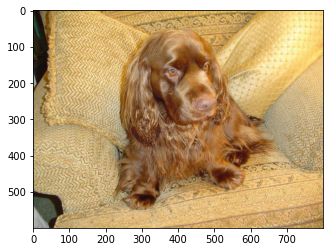

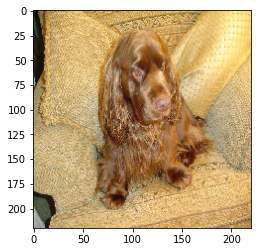

In [6]:
TrainFolder = "/content/drive/MyDrive/Assigment1/train/data"
# 1.b
imgName = Labels.sample().id.values[0]+".jpg"
print(imgName)
Image = mpimg.imread(TrainFolder+"/"+imgName)
NewImage = load_img(TrainFolder+"/"+imgName, target_size=(220,220))
#print(NewImage)
print("Image Shape - {}".format(Image.shape))
plt.figure()
plt.imshow(Image)
plt.figure()
plt.imshow(NewImage)

## 1.C - 
  The representations are pretty much balanced averaging at - 85 pictures per breed more or less.

  the maximum amount of pictures per breed is - 126
  
  the minimum amount of pictures per breed is - 66

In [ ]:
#1.c
BreedsCounter = {}
for Row in Labels.iterrows():
    if Row[1].breed in BreedsCounter:
        BreedsCounter[Row[1].breed] = 1  + BreedsCounter[Row[1].breed]
    else:
        BreedsCounter[Row[1].breed] = 1
MinRepresentation = 1000
MinKey = ""
MaxRepresentation = 0
MaxKey = ""
AvgCounter = 0
for key in BreedsCounter:
    if BreedsCounter[key] < MinRepresentation:
        MinRepresentation = BreedsCounter[key]
        MinKey = key
    if BreedsCounter[key] > MaxRepresentation:
        MaxRepresentation = BreedsCounter[key]
        MaxKey = key
    AvgCounter += BreedsCounter[key]
print("Max Representation - "+MaxKey + ": #"+str(MaxRepresentation))
print("Min Representation - "+MinKey + ": #"+str(MinRepresentation))
print("Overall classes- "+str(len(BreedsCounter)))
AvgRepresentation = AvgCounter/len(BreedsCounter)
print("Average Representation- "+str(AvgRepresentation))

Max Representation - scottish_deerhound: #126
Min Representation - eskimo_dog: #66
Overall classes- 120
Average Representation- 85.18333333333334


## 1.E - 
  Here are some examples showing breeds which are hard to distinguish from one another and some that are easily distinguishable:
  

An Example of 2 breeds which would be difficult to distinguish from one another : Golden Retriever and Labrador Retriever



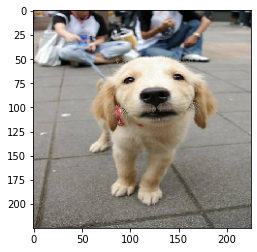

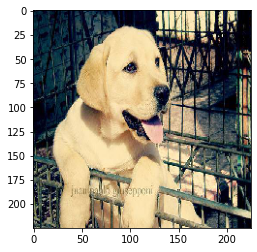

In [ ]:
#1.e 

Golden = "0825e8471e3c9a14dc341bdd8630f05e.jpg"
Labrador = "142ef9990b3db0d521f87f9133a6b84f.jpg"

GoldenImage = load_img(TrainFolder+"/"+Golden, target_size=(225,225))
LabradorImage = load_img(TrainFolder+"/"+Labrador, target_size=(225,225))

print("An Example of 2 breeds which would be difficult to distinguish from one another : Golden Retriever and Labrador Retriever")
plt.figure()
plt.imshow(GoldenImage)
plt.figure()
plt.imshow(LabradorImage)
print()



An Example of 2 breeds which would be easily distinguishable from one another : pomeranian and German Shepherd


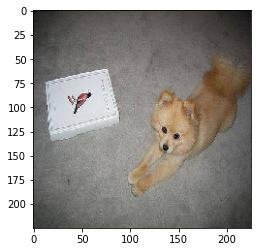

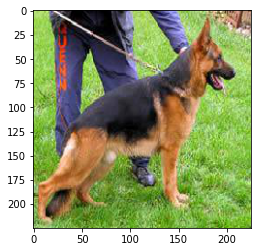

In [ ]:
pomeranian = "1cf650efe8efbadf87c1fd3c12dbdd05.jpg"
GermanShep = "0ac12e1849fd51b2158d16b8f5e75551.jpg"

pomeranianImage = load_img(TrainFolder+"/"+pomeranian, target_size=(225,225))
GermanShepImage = load_img(TrainFolder+"/"+GermanShep, target_size=(225,225))

print("An Example of 2 breeds which would be easily distinguishable from one another : pomeranian and German Shepherd")
plt.figure()
plt.imshow(pomeranianImage)
plt.figure()
plt.imshow(GermanShepImage)

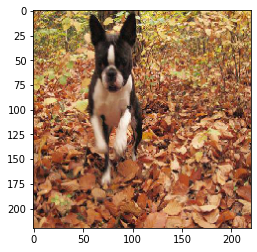

In [8]:
len(ImageArr[0])
plt.imshow(ImageArr[0])
pickle.dump(ImageArr, open( "sorted" + '.p', "wb" ) )
path = "/content/drive/MyDrive/Assigment1/sorted.pt"

In [9]:
newTrain = np.array(ImageArr)
print(newTrain.shape)

(10222, 220, 220, 3)


# **Data Preperation**

In [ ]:
# print(np.asarray(NewImage))
ImageArr = []
LabelArr = Labels['id']
counter = 1
for image in LabelArr:
  print(counter)
  NewImage = load_img(TrainFolder+"/"+image+".jpg", target_size=(220,220))
  ImageArr.append(np.asarray(NewImage))
  counter += 1
print(ImageArr)

Converting from array to nparray

In [5]:
newTrain = np.asarray(ImageArr)
print(newTrain.shape)


Saving in Drive

In [5]:
path = "/content/drive/MyDrive/Assigment1/"
pickle.dump(newTrain, open( path+"sorted" + '.p', "wb" ) )

Load from Drive

In [3]:
newTrain = pickle.load( open( "/content/drive/MyDrive/Assigment1/"+"sorted.p", "rb" ) )
print(newTrain.shape)

(10222, 220, 220, 3)


Creating a df holding the labels by id order

In [4]:

labels = Labels["breed"].values
labelIDs = Labels["id"].values
NewLabels = Labels[:]
NewLabels.drop('id', axis='columns', inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Create OneHotLabel from the df created before

In [5]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(NewLabels)
# splitting data
newTest = newTrain[-3000:]
newTrain = newTrain[:-3000]

onehot_Test = onehot_encoded[-3000:]
onehot_encoded = onehot_encoded[:-3000]

inverted = label_encoder.inverse_transform([argmax(onehot_encoded[6, :])])

print(inverted)
print(labelIDs[10220])

[19 37 85 ...  3 75 28]
['bedlington_terrier']
ffe5f6d8e2bff356e9482a80a6e29aac


test print


['bedlington_terrier']


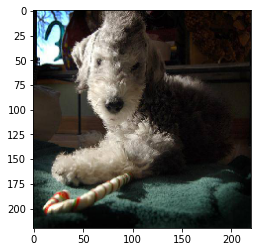

In [9]:
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[6, :])])
print(inverted)
plt.imshow(newTrain[6])

## **Models**

# **2.a+b**

CVModel


In [2]:
inp = Input((220,220,3))
x = Conv2D(32,(3,3),activation="relu",)(inp)
x = Conv2D(32,(3,3),activation="relu",)(x)
x = Dropout(0.5)(x)
x = MaxPool2D()(x)
x = Conv2D(16,(3,3),activation="relu",)(x)
x = Conv2D(16,(3,3),activation="relu",)(x)
x = Dropout(0.5)(x)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(120,activation="softmax")(x)


CVModel = Model(inputs = inp,outputs = x)
CVModel.summary()
CVModel.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['acc'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 220, 220, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 218, 218, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 32)      9248      
_________________________________________________________________
dropout (Dropout)            (None, 216, 216, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 16)      4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 104, 104, 16)     

In [3]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score 

DividedTrain = np.array_split(newTrain,5)
DividedLabels = np.array_split(onehot_encoded,5)

print(len(newTrain))
print(len(onehot_encoded))
index = [0,1,2,3,4]

print(type(DividedTrain[0]))
for num in index:
  if num==0:
    FoldTrain = np.concatenate((DividedTrain[1],DividedTrain[2],DividedTrain[3],DividedTrain[4]))
    newLabel = np.concatenate((DividedLabels[1],DividedLabels[2],DividedLabels[3],DividedLabels[4]))
    Results1 = CVModel.fit(np.expand_dims(FoldTrain,axis=-1),newLabel,validation_data=(DividedTrain[0],DividedLabels[0]),shuffle=True,epochs=10)
  if num==1:
    FoldTrain = np.concatenate((DividedTrain[0],DividedTrain[2],DividedTrain[3],DividedTrain[4]))
    newLabel = np.concatenate((DividedLabels[0],DividedLabels[2],DividedLabels[3],DividedLabels[4]))
    Results2 = CVModel.fit(np.expand_dims(FoldTrain,axis=-1),newLabel,validation_data=(DividedTrain[1],DividedLabels[1]),shuffle=True,epochs=10)
  if num==2:
    FoldTrain = np.concatenate((DividedTrain[0],DividedTrain[1],DividedTrain[3],DividedTrain[4]))
    newLabel = np.concatenate((DividedLabels[0],DividedLabels[1],DividedLabels[3],DividedLabels[4]))
    Results3 = CVModel.fit(np.expand_dims(FoldTrain,axis=-1),newLabel,validation_data=(DividedTrain[2],DividedLabels[2]),shuffle=True,epochs=10)
  if num==3:
    FoldTrain = np.concatenate((DividedTrain[0],DividedTrain[1],DividedTrain[2],DividedTrain[4]))
    newLabel = np.concatenate((DividedLabels[0],DividedLabels[1],DividedLabels[2],DividedLabels[4]))
    Results4 = CVModel.fit(np.expand_dims(FoldTrain,axis=-1),newLabel,validation_data=(DividedTrain[3],DividedLabels[3]),shuffle=True,epochs=10)
  if num==4:
    FoldTrain = np.concatenate((DividedTrain[0],DividedTrain[1],DividedTrain[2],DividedTrain[3]))
    newLabel = np.concatenate((DividedLabels[0],DividedLabels[1],DividedLabels[2],DividedLabels[3]))
    Results5 = CVModel.fit(np.expand_dims(FoldTrain,axis=-1),newLabel,validation_data=(DividedTrain[4],DividedLabels[4]),shuffle=True,epochs=10)


7222
7222
<class 'numpy.ndarray'>
Epoch 1/10
181/181 [==============================] - 14s 78ms/step - loss: 13.8984 - acc: 0.0093 - val_loss: 4.7849 - val_acc: 0.0069
Epoch 2/10
181/181 [==============================] - 13s 74ms/step - loss: 4.7716 - acc: 0.0208 - val_loss: 4.7823 - val_acc: 0.0055
Epoch 3/10
181/181 [==============================] - 14s 75ms/step - loss: 4.7276 - acc: 0.0343 - val_loss: 4.7825 - val_acc: 0.0090
Epoch 4/10
181/181 [==============================] - 14s 76ms/step - loss: 4.5645 - acc: 0.0933 - val_loss: 4.8155 - val_acc: 0.0166
Epoch 5/10
181/181 [==============================] - 14s 77ms/step - loss: 3.8512 - acc: 0.2233 - val_loss: 5.1119 - val_acc: 0.0145
Epoch 6/10
181/181 [==============================] - 14s 78ms/step - loss: 2.6166 - acc: 0.4435 - val_loss: 6.3346 - val_acc: 0.0173
Epoch 7/10
181/181 [==============================] - 14s 79ms/step - loss: 1.6838 - acc: 0.6422 - val_loss: 8.4353 - val_acc: 0.0194
Epoch 8/10
181/181 [=======

# **First Fold Results**

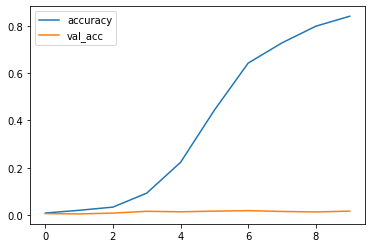

In [4]:
plt.plot(Results1.history['acc'])
plt.plot(Results1.history['val_acc'])

plt.legend(['accuracy', 'val_acc'], loc='upper left')

# **Second Fold Results**

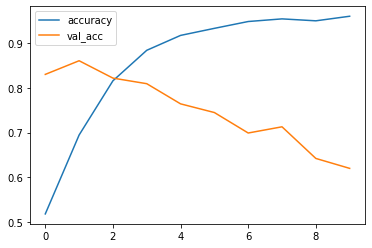

In [5]:
plt.plot(Results2.history['acc'])
plt.plot(Results2.history['val_acc'])

plt.legend(['accuracy', 'val_acc'], loc='upper left')

# **Third Fold Results**

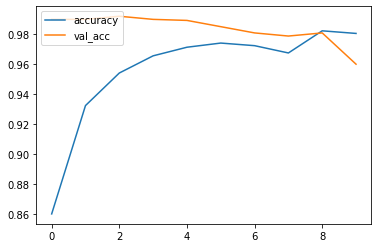

In [6]:
plt.plot(Results3.history['acc'])
plt.plot(Results3.history['val_acc'])

plt.legend(['accuracy', 'val_acc'], loc='upper left')

# **Fourth Fold Results**

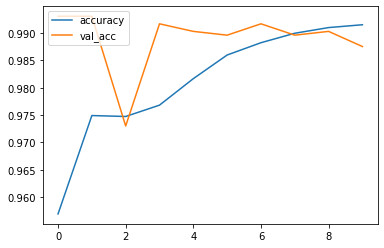

In [7]:
plt.plot(Results4.history['acc'])
plt.plot(Results4.history['val_acc'])

plt.legend(['accuracy', 'val_acc'], loc='upper left')

# **Fifth Fold Results**

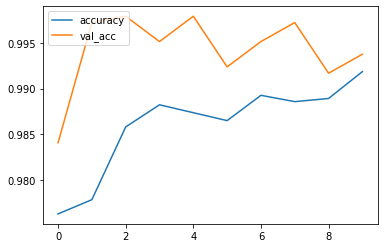

In [8]:
plt.plot(Results5.history['acc'])
plt.plot(Results5.history['val_acc'])

plt.legend(['accuracy', 'val_acc'], loc='upper left')

In [15]:
predicted=CVModel.predict(newTest)
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

Predictions = np.argmax(predicted, axis=1)
TestLabels = integer_encoded[-3000:]
print(Predictions)
print(TestLabels)

print(accuracy_score(TestLabels, Predictions))

[ 42 103  77 ...   5  69  12]
[[66]
 [32]
 [39]
 ...
 [ 3]
 [75]
 [28]]
0.018666666666666668


# **2.d+e**


# **Improvements and Augmentation** for 2.b


In [3]:


inp = Input(shape=(220,220,3))
x = Conv2D(32,(3,3),activation='relu')(inp)
x = Conv2D(32,(3,3),activation='relu')(x)
x = Dropout(0.3)(x)
x = MaxPool2D()(x)
x = Conv2D(16,(3,3),activation='relu')(x)
x = Conv2D(16,(3,3),activation='relu')(x)
x = Dropout(0.33)(x)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(600,activation='relu')(x)
x = Dense(120,activation='softmax')(x)

AugmentModel = Model(inputs = inp,outputs = x)
AugmentModel.summary()
AugmentModel.compile(loss = 'categorical_crossentropy',
optimizer = 'Adagrad',
metrics = ['acc'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 220, 220, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 218, 218, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 216, 216, 32)      9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 216, 216, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 106, 106, 16)      4624      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 104, 104, 16)     

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newTrain, onehot_encoded, test_size=0.1, random_state=42)

datagen = ImageDataGenerator(
     rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=False)


Results = AugmentModel.fit(datagen.flow(X_train, y_train, batch_size=32,shuffle=True),epochs=30,validation_data=(X_test,y_test),validation_steps = len(X_test) / 32, steps_per_epoch=len(X_train) / 32)

Epoch 1/30
204/203 [==============================] - 69s 338ms/step - loss: 22.8142 - acc: 0.0077 - val_loss: 4.8056 - val_acc: 0.0083
Epoch 2/30
204/203 [==============================] - 69s 336ms/step - loss: 4.7886 - acc: 0.0111 - val_loss: 4.7882 - val_acc: 0.0041
Epoch 3/30
204/203 [==============================] - 69s 339ms/step - loss: 4.7712 - acc: 0.0146 - val_loss: 4.7778 - val_acc: 0.0194
Epoch 4/30
204/203 [==============================] - 70s 341ms/step - loss: 4.7612 - acc: 0.0120 - val_loss: 4.7763 - val_acc: 0.0111
Epoch 5/30
204/203 [==============================] - 69s 340ms/step - loss: 4.7466 - acc: 0.0143 - val_loss: 4.7618 - val_acc: 0.0166
Epoch 6/30
204/203 [==============================] - 69s 338ms/step - loss: 4.7333 - acc: 0.0177 - val_loss: 4.7478 - val_acc: 0.0194
Epoch 7/30
204/203 [==============================] - 69s 337ms/step - loss: 4.7231 - acc: 0.0183 - val_loss: 4.7545 - val_acc: 0.0194
Epoch 8/30
204/203 [==============================] - 

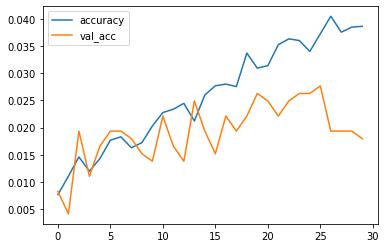

In [6]:
plt.plot(Results.history['acc'])
plt.plot(Results.history['val_acc'])

plt.legend(['accuracy', 'val_acc'], loc='upper left')

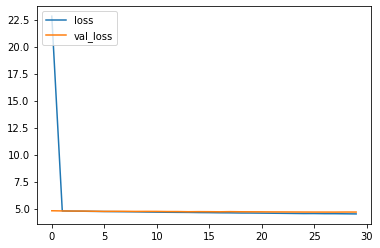

In [7]:
plt.plot(Results.history['acc'])
plt.plot(Results.history['val_acc'])

plt.legend(['accuracy', 'val_acc'], loc='upper left')

plt.plot(Results.history['loss'])
plt.plot(Results.history['val_loss'])

plt.legend(['loss', 'val_loss'], loc='upper left')

In [5]:
predicted=AugmentModel.predict(newTest)
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

Predictions = np.argmax(predicted, axis=1)
TestLabels = integer_encoded[-3000:]
print(Predictions)
print(TestLabels)

print(accuracy_score(TestLabels, Predictions))

[61 30 13 ... 14 95 14]
[[66]
 [32]
 [39]
 ...
 [ 3]
 [75]
 [28]]
0.029333333333333333


# **3.a+b**

In [2]:
def get_model_all_classes(n_classes):
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(220,220,3))
    vgg16.summary()
    for l in vgg16.layers:
        l.trainable = False

    x = GlobalAveragePooling2D()(vgg16.layers[-5].output)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dense(n_classes,activation='softmax',name = 'predictions')(x)
    model = Model(inputs = vgg16.input,outputs = x)
    model.summary()
    return model

In [3]:
VGGM = get_model_all_classes(120)
VGGM.compile(loss='categorical_crossentropy',optimizer='adam', metrics = 'accuracy')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 220, 220, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 220, 220, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 220, 220, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 110, 110, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 110, 110, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 110, 110, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 55, 55, 128)       0     

# **3.c**

In [11]:
 Results = VGGM.fit(np.expand_dims(newTrain,axis=-1),onehot_encoded,validation_split=0.2,shuffle=True,epochs=30)

Epoch 1/30
181/181 [==============================] - 26s 143ms/step - loss: 162.8299 - accuracy: 0.0156 - val_loss: 85.3958 - val_accuracy: 0.0242
Epoch 2/30
181/181 [==============================] - 26s 141ms/step - loss: 128.8406 - accuracy: 0.0282 - val_loss: 70.6108 - val_accuracy: 0.0651
Epoch 3/30
181/181 [==============================] - 27s 150ms/step - loss: 108.9487 - accuracy: 0.0523 - val_loss: 64.8498 - val_accuracy: 0.0830
Epoch 4/30
181/181 [==============================] - 27s 149ms/step - loss: 94.8428 - accuracy: 0.0708 - val_loss: 58.4224 - val_accuracy: 0.1031
Epoch 5/30
181/181 [==============================] - 26s 145ms/step - loss: 84.0932 - accuracy: 0.0956 - val_loss: 64.2563 - val_accuracy: 0.0976
Epoch 6/30
181/181 [==============================] - 27s 147ms/step - loss: 76.0388 - accuracy: 0.1122 - val_loss: 53.0900 - val_accuracy: 0.1211
Epoch 7/30
181/181 [==============================] - 27s 149ms/step - loss: 69.2196 - accuracy: 0.1272 - val_loss:

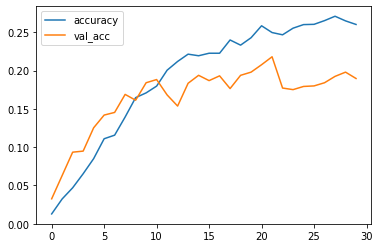

In [10]:
plt.plot(Results.history['accuracy'])
plt.plot(Results.history['val_accuracy'])

plt.legend(['accuracy', 'val_acc'], loc='upper left')


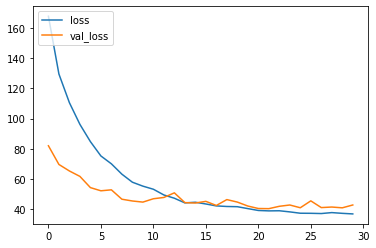

In [11]:

plt.plot(Results.history['loss'])
plt.plot(Results.history['val_loss'])

plt.legend(['loss', 'val_loss'], loc='upper left')

In [8]:
predicted=model.predict(newTest)
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

Predictions = np.argmax(predicted, axis=1)
TestLabels = integer_encoded[-3000:]
print(Predictions)
print(TestLabels)

print(accuracy_score(TestLabels, Predictions))

[60 14 60 ... 80 60 65]
[[66]
 [32]
 [39]
 ...
 [ 3]
 [75]
 [28]]
0.22033333333333333


# 3.d

In [13]:
from sklearn import svm
import timeit
OnelessLayer = Model(inputs=VGGM.input,outputs=VGGM.layers[-2].output)

ClassicalTrain = OnelessLayer.predict(newTrain)
ClassicalTest = OnelessLayer.predict(newTest)

clf = svm.SVC(kernel='linear')

start_time= timeit.default_timer()
clf.fit(ClassicalTrain, integer_encoded[:-3000])
Classicalpredictions = clf.predict(ClassicalTest)
deltatime = timeit.default_timer() - start_time

print("Time:" , deltatime) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time: 70.39930269900015


In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

TestLabels = integer_encoded[-3000:]
print(Classicalpredictions)
print(TestLabels)

print(accuracy_score(TestLabels, Classicalpredictions))

[113  89 111 ...  66  75  65]
[[66]
 [32]
 [39]
 ...
 [ 3]
 [75]
 [28]]
0.288


# VGG Augmented for comparing results

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newTrain, onehot_encoded, test_size=0.1, random_state=42)


datagen = ImageDataGenerator(
     rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True)


Results = VGGM.fit(datagen.flow(X_train, y_train, batch_size=32,shuffle=True),epochs=30,validation_data=(X_test,y_test),validation_steps = len(X_test) / 32, steps_per_epoch=len(X_train) / 32)

Epoch 1/30
204/203 [==============================] - 72s 355ms/step - loss: 152.4775 - accuracy: 0.0122 - val_loss: 97.1304 - val_accuracy: 0.0277
Epoch 2/30
204/203 [==============================] - 73s 356ms/step - loss: 121.0795 - accuracy: 0.0265 - val_loss: 77.4526 - val_accuracy: 0.0622
Epoch 3/30
204/203 [==============================] - 73s 360ms/step - loss: 103.1876 - accuracy: 0.0351 - val_loss: 61.8503 - val_accuracy: 0.0775
Epoch 4/30
204/203 [==============================] - 73s 358ms/step - loss: 90.2767 - accuracy: 0.0563 - val_loss: 65.5691 - val_accuracy: 0.0899
Epoch 5/30
204/203 [==============================] - 73s 357ms/step - loss: 81.1833 - accuracy: 0.0742 - val_loss: 54.8854 - val_accuracy: 0.1300
Epoch 6/30
204/203 [==============================] - 73s 356ms/step - loss: 73.9741 - accuracy: 0.0834 - val_loss: 57.1663 - val_accuracy: 0.1148
Epoch 7/30
204/203 [==============================] - 72s 352ms/step - loss: 68.6766 - accuracy: 0.0972 - val_loss:

In [5]:
predicted=VGGM.predict(newTest)
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

Predictions = np.argmax(predicted, axis=1)
TestLabels = integer_encoded[-3000:]
print(Predictions)
print(TestLabels)

print(accuracy_score(TestLabels, Predictions))

[ 99 112 118 ... 100   6  59]
[[66]
 [32]
 [39]
 ...
 [ 3]
 [75]
 [28]]
0.18466666666666667
